In [27]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

In [2]:
#import cleaned_data into pandas DataFrame
data = pd.read_csv("../Data/cleaned_data.csv")

In [3]:
B, K = data.shape #tipe data berbentuk tuple 
print(f"Ukuran dataset yang kita miliki terdiri atas {B} Baris dan {K} Kolom")

Ukuran dataset yang kita miliki terdiri atas 1700 Baris dan 18 Kolom


In [4]:
print("Tipe data pada masing-masing kolom:")
data.dtypes

Tipe data pada masing-masing kolom:


country                 object
year                     int64
cereal_yield           float64
fdi_%GDP               float64
energy_per_GDP         float64
energy_per_capt        float64
co2_total              float64
co2_per_capt           float64
co2_per_unit           float64
popul_agglomeration    float64
protected_areas        float64
gdp                    float64
gni_capt               float64
under_5_mortality      float64
popul_growth           float64
Population             float64
urb_popul_growth       float64
urb_popul              float64
dtype: object

In [5]:
#menampilkan 10 data pertama pada dataset
data.head(10)

,country,year,cereal_yield,fdi_%GDP,energy_per_GDP,energy_per_capt,co2_total,co2_per_capt,co2_per_unit,popul_agglomeration,protected_areas,gdp,gni_capt,under_5_mortality,popul_growth,Population,urb_popul_growth,urb_popul
0,Angola,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,1.065352e+07,6.687032,4.099473e+06
1,United Arab Emirates,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1.909812e+06,5.265704,1.507988e+06
2,Argentina,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,3.309358e+07,1.762636,2.890393e+07
3,Australia,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,1.728400e+07,1.438378,1.478473e+07
4,Austria,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7.798899e+06,1.134999,5.131676e+06
5,Bangladesh,1991,2585.7,0.004491,154.496130,116.511476,15940.449,0.147913,196.135682,9.443704,1.537922,3.095744e+10,300.0,137.9,2.359199,1.077687e+08,4.260207,2.174773e+07
6,Bulgaria,1991,3990.0,0.510803,367.387480,2560.054449,59706.094,6.916832,992.618530,13.789261,2.416870,1.094355e+10,1620.0,22.3,-0.991363,8.632000e+06,-0.570562,5.755818e+06
7,Bolivia,1991,1358.0,0.973189,124.898118,394.957523,5779.192,0.848156,268.213775,25.655982,8.583622,5.343259e+09,760.0,116.7,2.306643,6.813834e+06,3.664292,3.840277e+06
8,Brazil,1991,1850.6,0.270783,131.112804,939.256647,219330.604,1.441571,201.231977,35.137914,10.994541,4.073378e+11,2870.0,57.1,1.654581,1.521469e+08,2.453520,1.147188e+08
9,Canada,1991,2580.7,0.480500,283.945526,7388.563674,449053.486,15.939889,612.576462,39.968292,6.016160,5.982081e+11,20420.0,8.0,1.360506,2.817168e+07,1.647301,2.164149e+07


In [6]:
#melakukan analisis statistika deskriptif menggunakan keseluruhan data
data.describe()

,year,cereal_yield,fdi_%GDP,energy_per_GDP,energy_per_capt,co2_total,co2_per_capt,co2_per_unit,popul_agglomeration,protected_areas,gdp,gni_capt,under_5_mortality,popul_growth,Population,urb_popul_growth,urb_popul
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1700.000000,1700.000000,1.700000e+03,1700.000000,1.700000e+03
mean,1999.570588,3013.317581,2.948940,249.822736,1968.979736,9.793999e+05,4.676663,482.303784,21.480126,12.201789,1.058568e+12,7898.668664,51.971955,1.451313,3.060142e+08,2.252231,1.347903e+08
std,5.143070,1796.206082,3.949722,186.195019,1959.419972,3.235692e+06,4.906273,392.192230,12.105158,9.116682,3.921323e+12,11592.516937,51.332162,1.129312,9.482329e+08,1.642009,4.145755e+08
min,1991.000000,175.700000,-15.027675,66.335372,116.511476,7.077310e+02,0.029411,45.552592,3.526316,0.000000,9.826326e+08,80.000000,3.200000,-2.397174,1.909812e+06,-2.757210,1.151309e+06
25%,1995.000000,1683.364736,0.834105,136.320490,542.882788,1.462125e+04,0.922769,257.139562,12.383953,5.839844,1.636221e+10,780.000000,10.000000,0.630306,9.973065e+06,0.925308,5.469794e+06
50%,2000.000000,2584.800000,1.993220,197.624918,1089.225939,7.728386e+04,3.093346,368.415567,18.525960,10.293791,9.882942e+10,2150.770301,32.350000,1.519890,2.689207e+07,2.315122,1.423239e+07
75%,2004.000000,3933.400000,3.702149,286.474936,2893.996077,3.708446e+05,7.441195,586.972993,28.988324,16.599298,4.122600e+11,9205.000000,79.925741,2.276853,8.234386e+07,3.364747,4.835246e+07
max,2008.000000,8410.800000,51.373951,1383.380011,12607.839262,3.064936e+07,37.106499,3343.454250,60.505780,53.749825,5.580488e+13,58620.000000,239.100000,11.180657,6.610030e+09,12.829046,3.264974e+09


In [7]:
data["energy_total"] = data["energy_per_GDP"]*data["gdp"]/1000

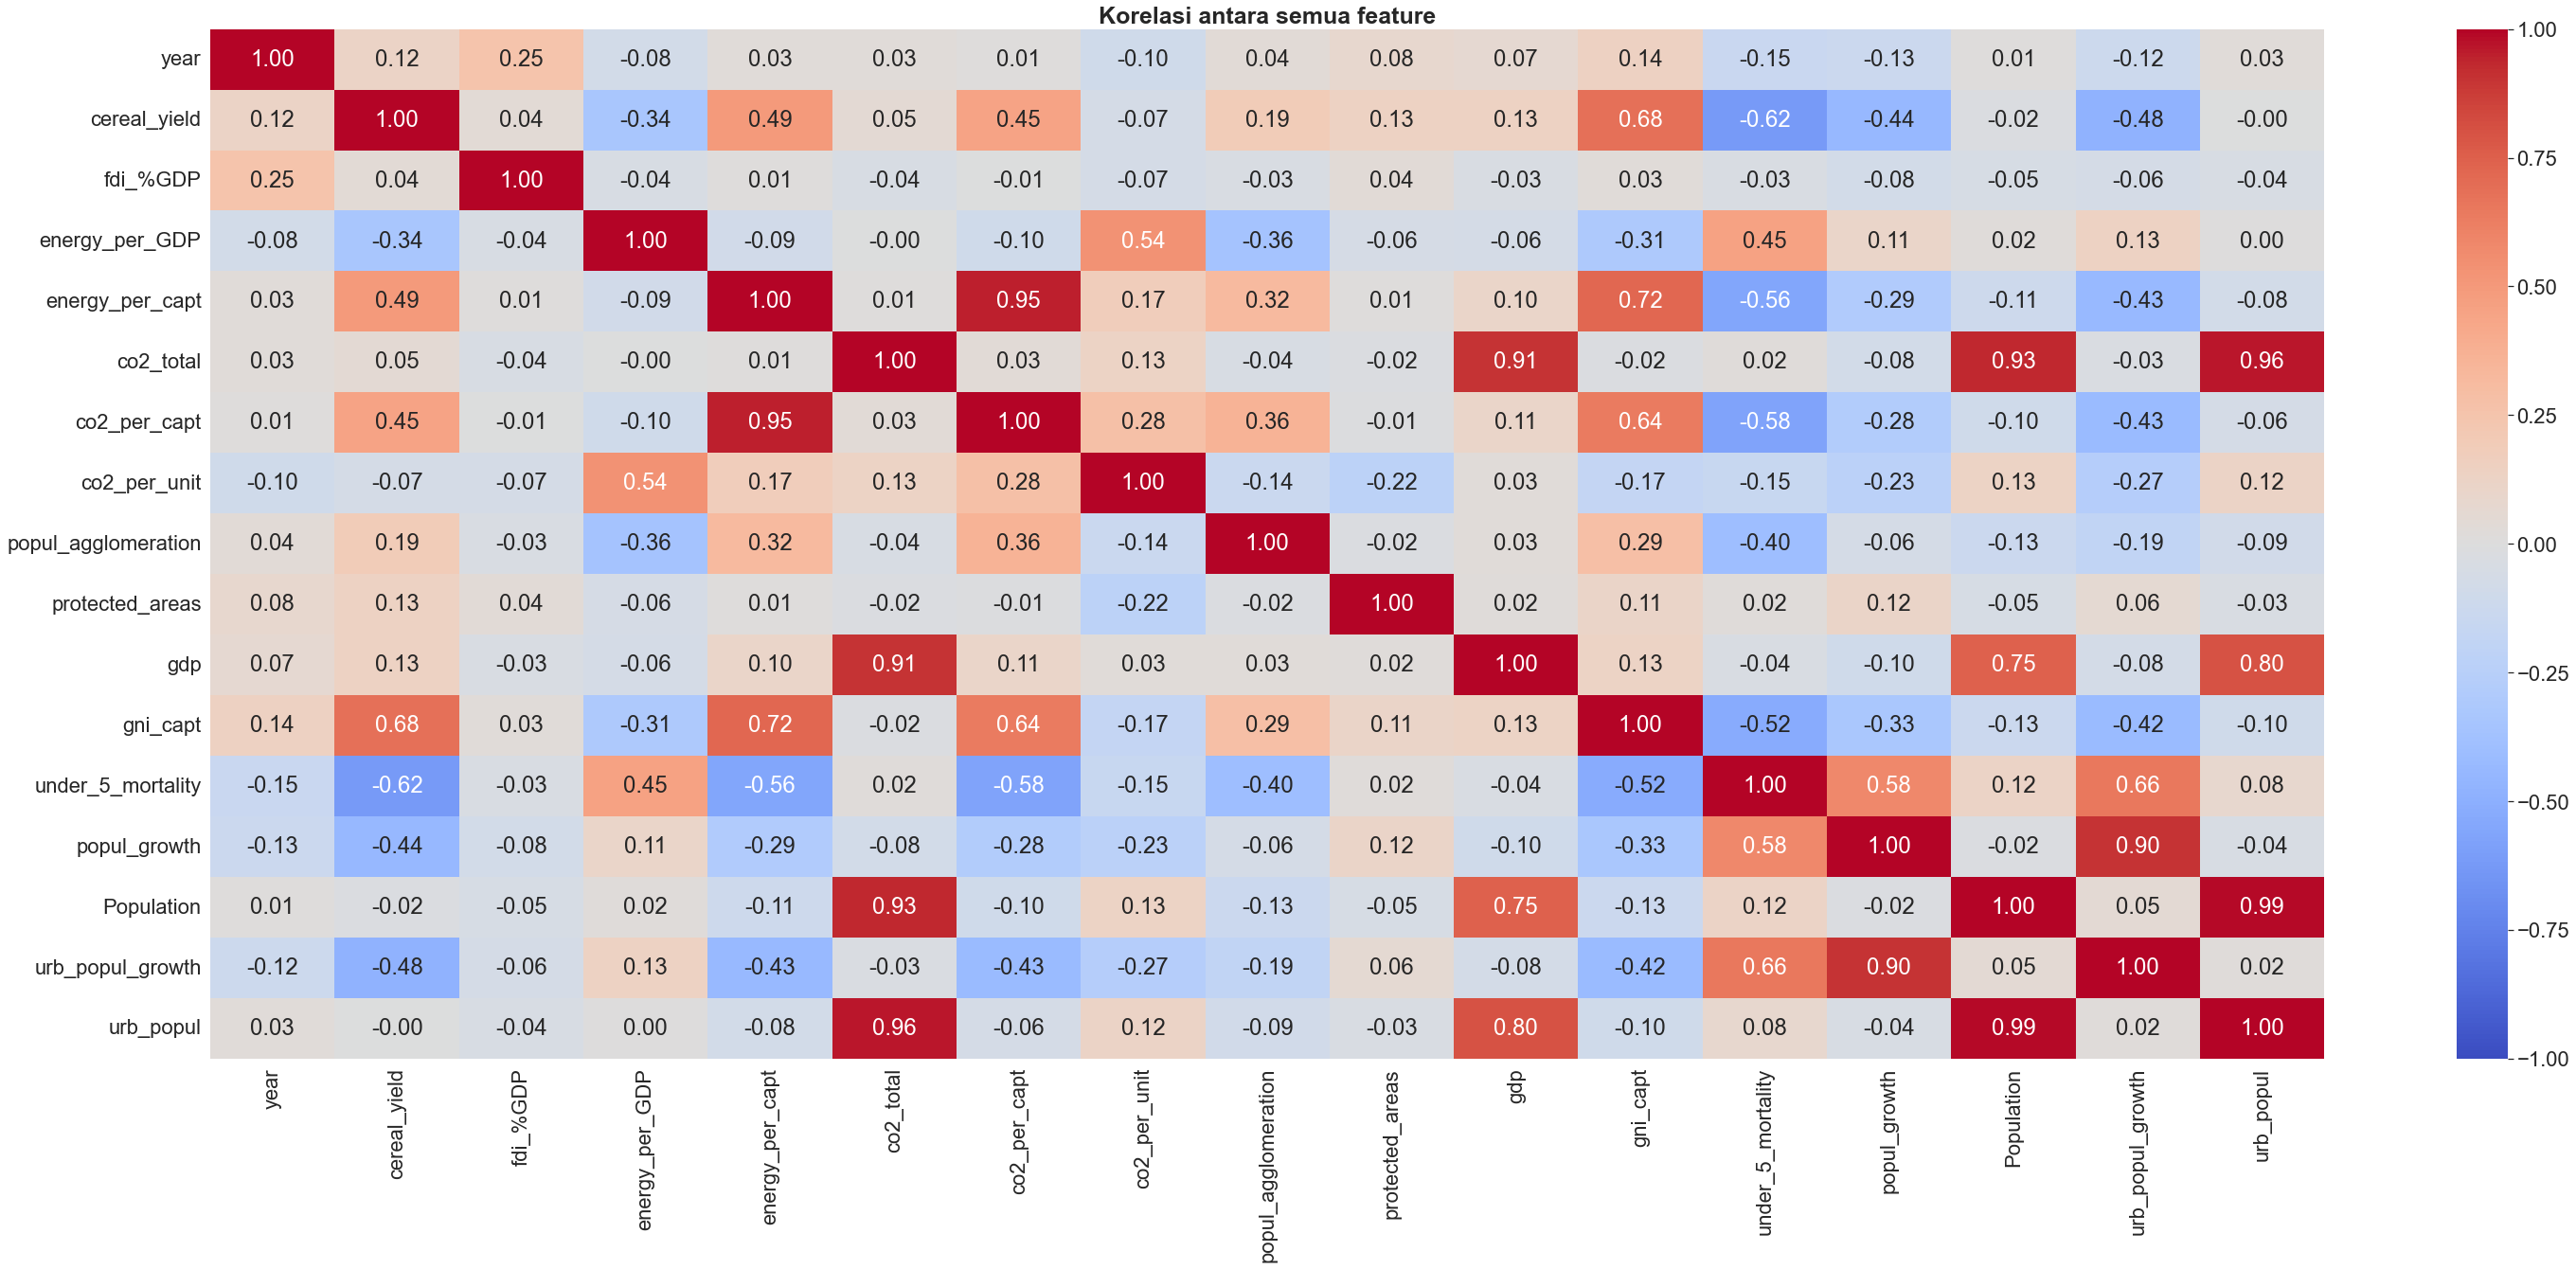

In [8]:
# select all features
all_features = data[[
                    "country","year","cereal_yield", "fdi_%GDP", "energy_per_GDP", "energy_per_capt",
                    "co2_total", "co2_per_capt", "co2_per_unit","popul_agglomeration", 
                    "protected_areas", "gdp","gni_capt", "under_5_mortality", 
                    "popul_growth", "Population", "urb_popul_growth","urb_popul"
                     ]]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(50,20))
sns.heatmap(all_features.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Korelasi antara semua feature', fontsize=25, weight='bold' )
plt.show()

sns.set(font_scale=1)

In [9]:
fig = px.scatter_matrix(data,
    dimensions=["cereal_yield","co2_per_capt", "popul_agglomeration", 
                "protected_areas","gni_capt", "urb_popul_growth"], width=2000, height=4000,
    color="country")
fig.show()

In [10]:
labels_dictionary={
       "cereal_yield":'Cereal yield (kg per hectare)',
       "fdi_%GDP":'Foreign direct investment, net inflows (% of GDP)',
       "energy_per_capt":'Energy use per capita (kilograms of oil equivalent)',
       "co2_per_capt":'CO2 emissions per capita (metric tons)',
       "popul_agglomeration":'Population in urban agglomerations >1million (%)',
       "protected_areas":'Nationally terrestrial protected areas (% of total land area)',
       "gdp":'GDP ($)',
       "gni_capt":'GNI per capita (Atlas $)',
       "popul_growth":'Population growth (annual %)', 
       "urb_popul_growth":'Urban population growth (annual %)'
}

In [11]:
#features = all_features[[
#                    "country",'year',"cereal_yield", "fdi_%GDP", "gni_capt", "energy_per_GDP", "energy_per_capt",
#                    "co2_per_capt","popul_agglomeration", "protected_areas", "gdp", 
#                    "popul_growth", "urb_popul_growth"
#                     ]]

In [12]:
#fig = px.scatter(features, x='co2_per_capt', y='year', color='country')
#fig.update_layout(
#    margin=dict(l=40, r=30, t=40, b=30),
#    paper_bgcolor="white"
#)
#fig.show()

In [13]:
data1=data

In [14]:
# Trimming : IQR
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # Menghitung jumlah data setelah di trim dengan IQR

year                   9.000000e+00
cereal_yield           2.250035e+03
fdi_%GDP               2.868043e+00
energy_per_GDP         1.501544e+02
energy_per_capt        2.351113e+03
co2_total              3.562234e+05
co2_per_capt           6.518426e+00
co2_per_unit           3.298334e+02
popul_agglomeration    1.660437e+01
protected_areas        1.075945e+01
gdp                    3.958978e+11
gni_capt               8.425000e+03
under_5_mortality      6.992574e+01
popul_growth           1.646547e+00
Population             7.237080e+07
urb_popul_growth       2.439439e+00
urb_popul              4.288267e+07
energy_total           7.850548e+10
dtype: float64


In [15]:
data_without_outlier = data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
data_without_outlier.shape # data setelah di cek outlier

c:\Users\Dewi\anaconda3\envs\learn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(836, 19)

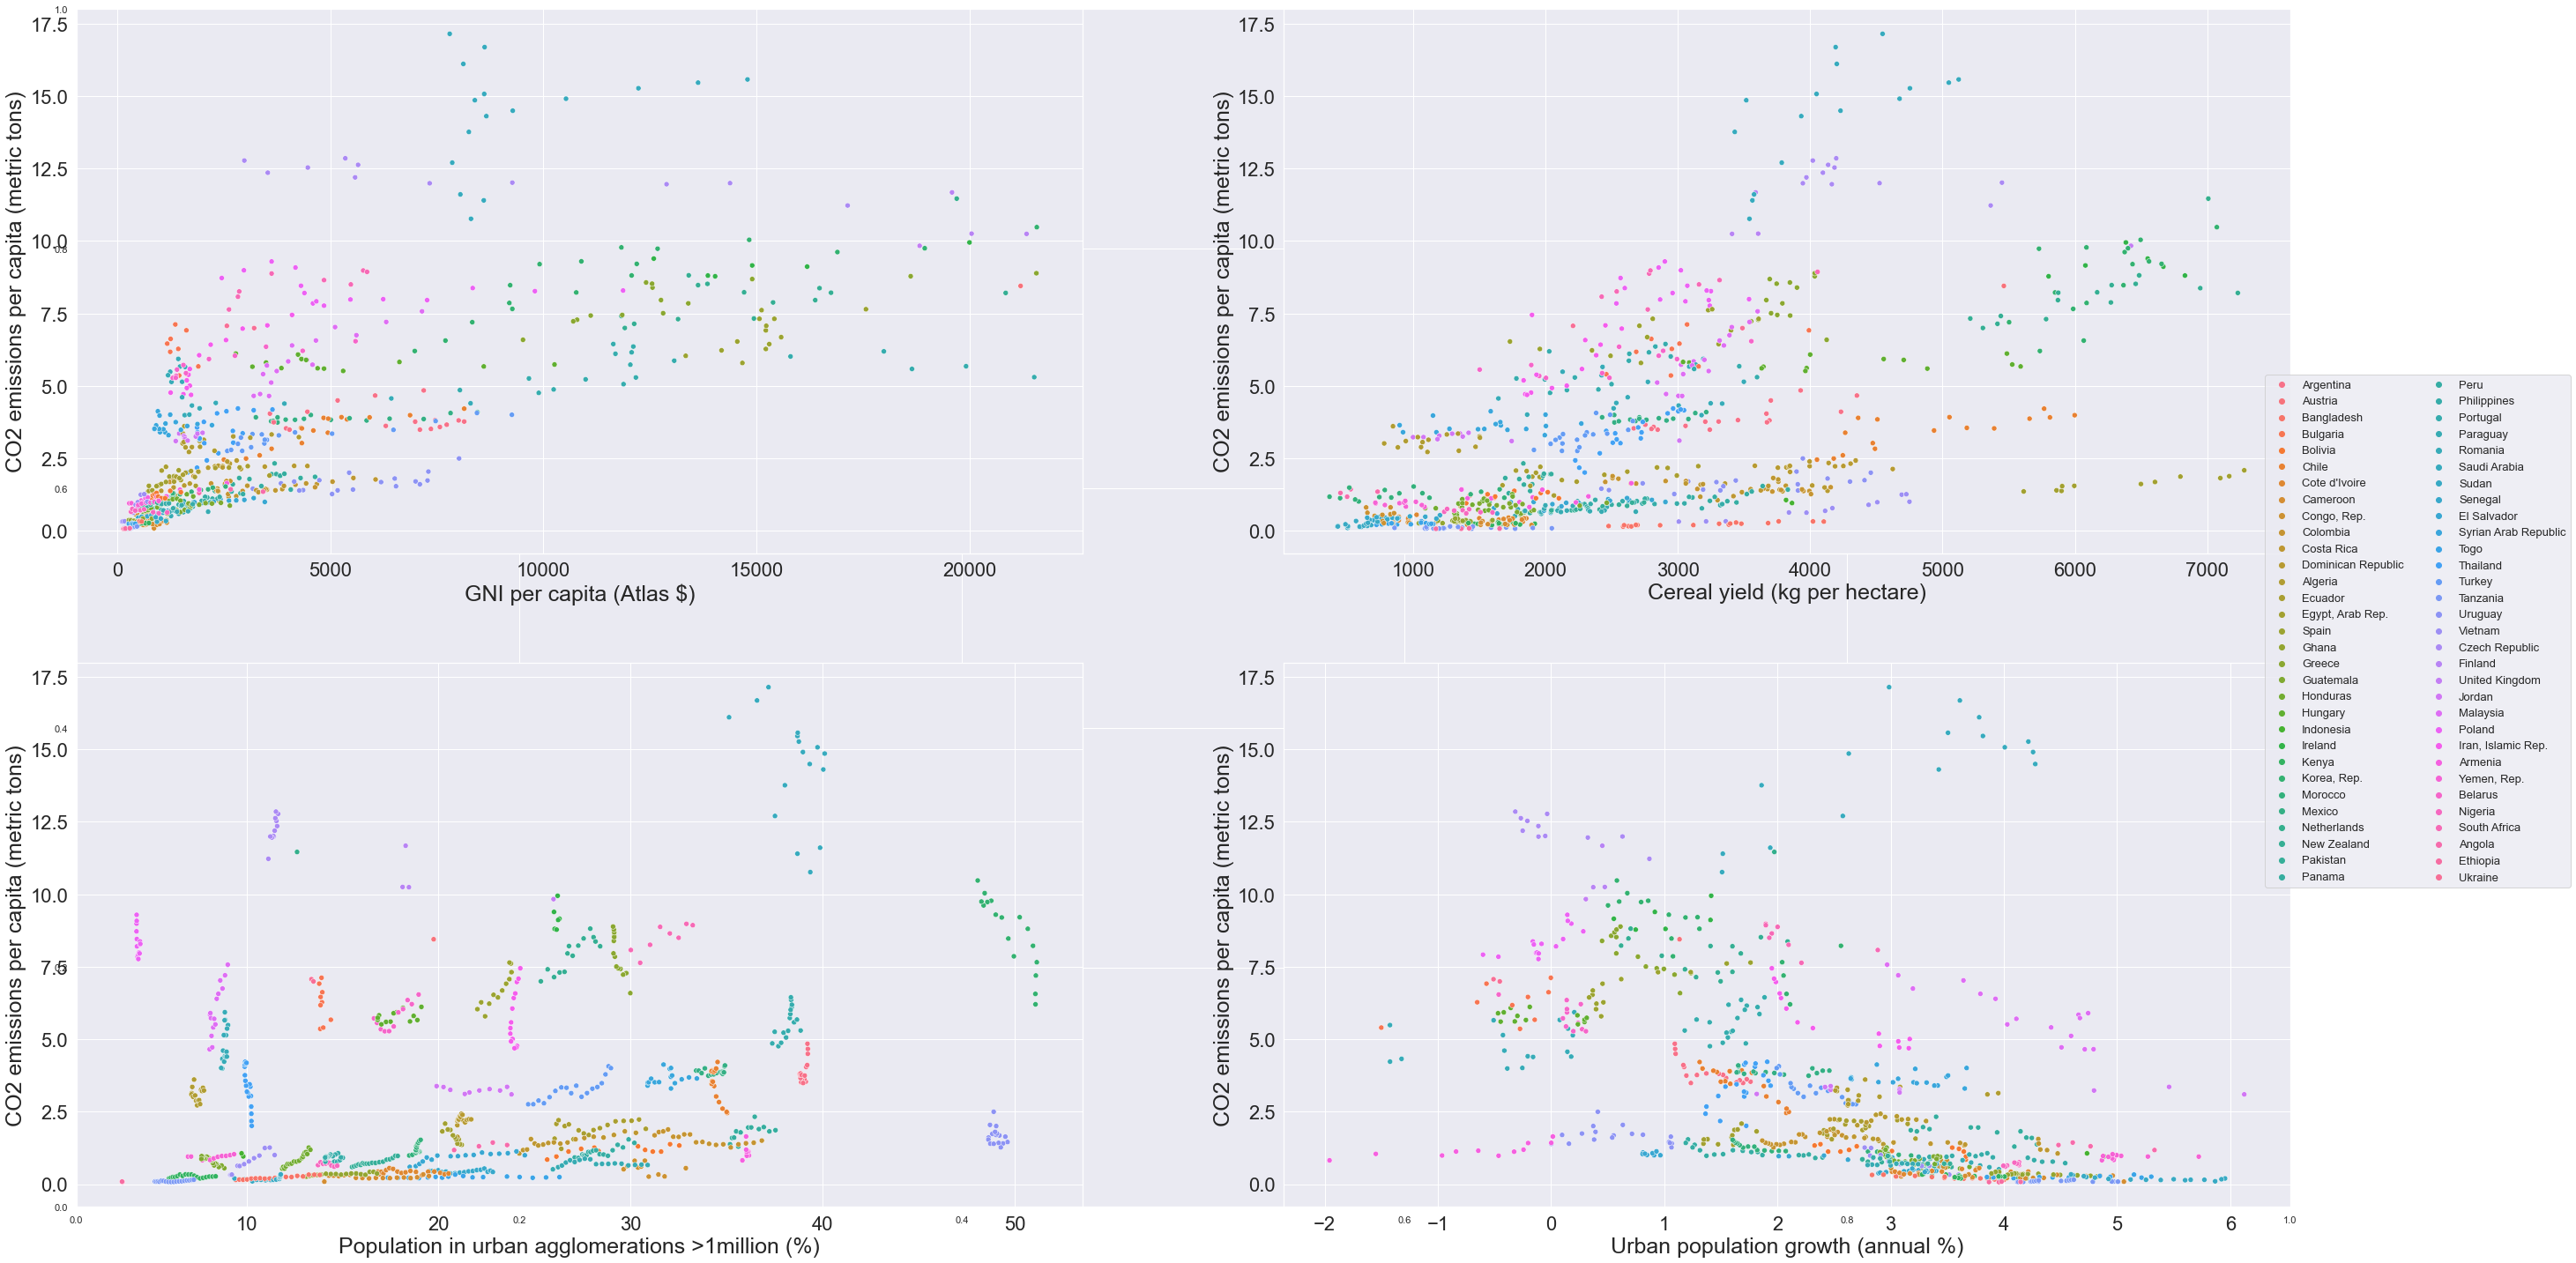

In [16]:
sns.set()

fig, ax = plt.subplots(figsize=(45,25))
ind = 1

sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [
                     ['gni_capt',labels_dictionary['gni_capt']], 
                     ['cereal_yield',labels_dictionary['cereal_yield']], 
                     ['popul_agglomeration',labels_dictionary['popul_agglomeration']], 
                     ['urb_popul_growth',labels_dictionary['urb_popul_growth']]
                     ]:
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_capt", data=data_without_outlier, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dictionary["co2_per_capt"], fontsize=25)
    ind += 1

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

Text(77.39078085937498, 0.5, 'CO2 emissions per capita (metric tons)')

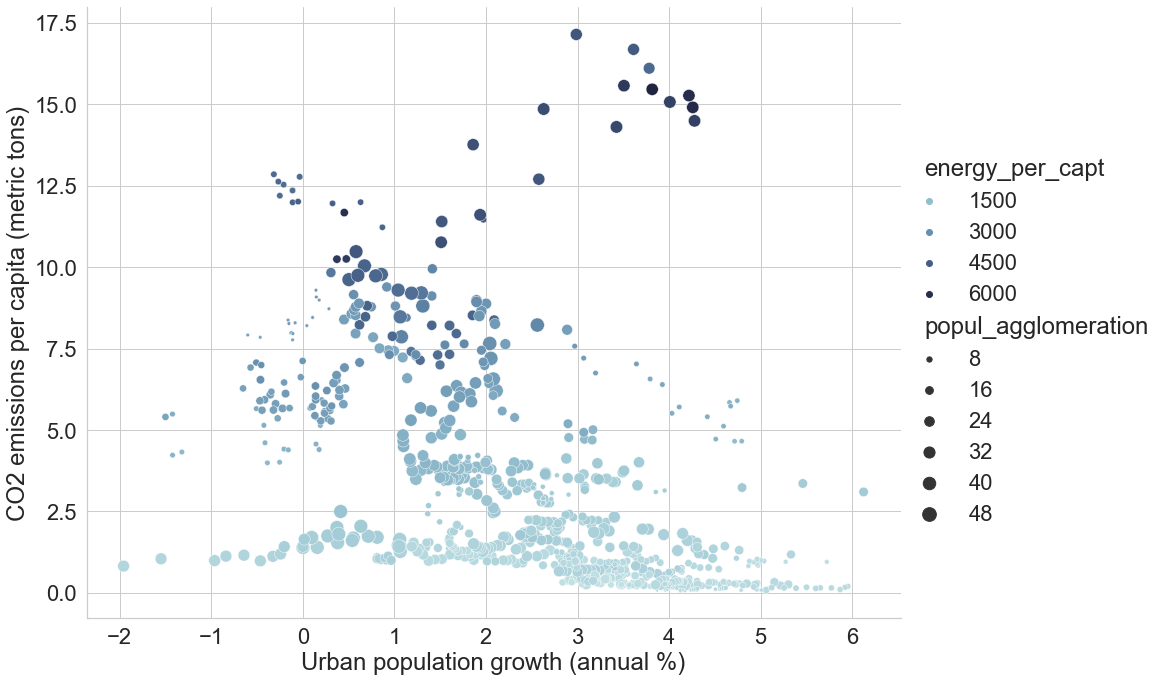

In [17]:
sns.set(style="whitegrid", font_scale=2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data_without_outlier,
    x="urb_popul_growth", y="co2_per_capt",
    hue="energy_per_capt", size="popul_agglomeration",
    palette=cmap, sizes=(10, 200),
    height=10, aspect= 4/3
)

g.ax.set_xlabel(labels_dictionary['urb_popul_growth'])
g.ax.set_ylabel(labels_dictionary['co2_per_capt'])

In [18]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0

In [19]:
print("Ukuran dataset:{}".format(data_without_outlier.shape))

Ukuran dataset:(836, 19)


In [20]:
data_without_outlier.columns

Index(['country', 'year', 'cereal_yield', 'fdi_%GDP', 'energy_per_GDP',
       'energy_per_capt', 'co2_total', 'co2_per_capt', 'co2_per_unit',
       'popul_agglomeration', 'protected_areas', 'gdp', 'gni_capt',
       'under_5_mortality', 'popul_growth', 'Population', 'urb_popul_growth',
       'urb_popul', 'energy_total'],
      dtype='object')

In [21]:
data_without_outlier.describe()

,year,cereal_yield,fdi_%GDP,energy_per_GDP,energy_per_capt,co2_total,co2_per_capt,co2_per_unit,popul_agglomeration,protected_areas,gdp,gni_capt,under_5_mortality,popul_growth,Population,urb_popul_growth,urb_popul,energy_total
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,8.360000e+02,836.000000,836.000000,836.000000,8.360000e+02,836.000000,8.360000e+02,8.360000e+02
mean,1999.454545,2627.931579,2.308642,202.644382,1268.373197,85385.551091,3.080353,385.105590,22.031771,11.531317,9.491985e+10,3592.523923,52.305024,1.600865,3.160870e+07,2.510407,1.591326e+07,1.656852e+10
std,5.126107,1439.662721,1.945760,99.190948,1181.286025,115578.677748,3.270590,216.845672,11.304721,8.505418,1.494858e+11,4404.763613,44.533099,1.005343,3.430409e+07,1.504654,1.613071e+07,2.493277e+10
min,1991.000000,366.600000,-2.498849,66.335372,116.511476,777.404000,0.071645,45.552592,3.526316,0.250873,9.826326e+08,110.000000,4.100000,-1.819573,2.453938e+06,-1.957213,1.151309e+06,1.570002e+08
25%,1995.000000,1539.825000,0.763859,126.376216,446.683813,6392.497750,0.700351,224.164260,12.351471,4.785763,1.183430e+10,780.000000,17.075000,1.012132,8.952378e+06,1.519711,4.628726e+06,2.287441e+09
50%,2000.000000,2428.600000,1.914377,175.146839,748.438632,34011.425000,1.593879,333.422700,20.948965,9.410963,3.748957e+10,1730.000000,34.850000,1.729290,1.856930e+07,2.769660,8.433309e+06,6.645369e+09
75%,2004.000000,3421.825000,3.445091,248.954727,1781.899546,104675.431750,4.672872,461.985749,29.881975,18.206396,1.107053e+11,4277.500000,83.100000,2.400695,3.937280e+07,3.599394,2.340730e+07,1.778944e+10
max,2008.000000,7280.000000,7.761462,511.013449,6379.735088,567523.255000,17.144135,1079.986361,51.142148,31.294458,9.810978e+11,21580.000000,183.200000,4.528387,1.905124e+08,6.124166,8.260181e+07,1.761763e+11


In [22]:
features = [
            "cereal_yield", "fdi_%GDP", "gni_capt", "energy_per_GDP", "energy_per_capt",
            "popul_agglomeration", "protected_areas", "gdp", "popul_growth", "urb_popul_growth", "energy_total"
            ]
label = ["co2_per_capt"]

feature = np.array(data_without_outlier[features])
labels = np.array(data_without_outlier[label])

In [23]:
feature

array([[2.66610000e+03, 1.28557882e+00, 3.96000000e+03, ...,
        1.37259322e+00, 1.76263616e+00, 3.28448667e+10],
       [5.46300000e+03, 2.09141663e-01, 2.12000000e+04, ...,
        1.13499913e+00, 1.13499920e+00, 2.21989866e+10],
       [2.58570000e+03, 4.49146993e-03, 3.00000000e+02, ...,
        2.35919934e+00, 4.26020706e+00, 4.78280541e+09],
       ...,
       [3.94390000e+03, 5.80358823e+00, 8.02000000e+03, ...,
        3.04778368e-01, 4.13179462e-01, 3.31984878e+09],
       [9.39100000e+02, 5.77554388e+00, 9.70000000e+02, ...,
        3.04959841e+00, 4.96069446e+00, 3.82677963e+09],
       [4.05530000e+03, 3.50366162e+00, 5.86000000e+03, ...,
        1.10405722e+00, 1.89744981e+00, 8.81417804e+10]])

In [25]:
labels

array([[ 3.53607278],
       [ 8.44845612],
       [ 0.14791346],
       [ 6.91683202],
       [ 0.84815568],
       [ 2.45671496],
       [ 0.43536469],
       [ 0.08867594],
       [ 0.51554481],
       [ 1.68747143],
       [ 1.06021349],
       [ 1.38090304],
       [ 3.14141839],
       [ 1.57114739],
       [ 1.3582844 ],
       [ 6.03713673],
       [ 0.26581662],
       [ 6.59023519],
       [ 0.55339802],
       [ 0.5369    ],
       [ 6.11520167],
       [ 0.95881006],
       [ 9.39085657],
       [ 0.19968723],
       [ 6.2039321 ],
       [ 0.98961825],
       [ 3.91726856],
       [11.46016583],
       [ 6.99805156],
       [ 0.59357058],
       [ 1.37545046],
       [ 0.92296339],
       [ 0.72577092],
       [ 4.85549925],
       [ 0.51286937],
       [ 5.93188851],
       [16.10555122],
       [ 0.19833742],
       [ 0.45901591],
       [ 0.59679779],
       [ 3.40370135],
       [ 0.22504436],
       [ 2.01257149],
       [ 2.75653204],
       [ 0.0924705 ],
       [ 1

In [50]:
# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(feature,
                                                                            labels,
                                                                            test_size=0.6,
                                                                            random_state=random_state_num)

In [51]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(features,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[6 9 1 3 1 7 5 8 1 4 2]
Chosen important features:
['gni_capt', 'energy_per_capt', 'popul_growth']


In [52]:
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(334, 11)
Training subset array shape after the recursive feature elimination:
(334, 3)
Test subset array shape after the recursive feature elimination:
(502, 3)


In [53]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [54]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [55]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

best number of estimators:
800
best max_features:
auto
max_depth:
100
min_samples_split
2
min_samples_leaf
2


In [56]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [57]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.962
Standard deviation of the R2 score over all folds = 0.013
R2 score for each fold:
Fold  1    0.986
Fold  2    0.965
Fold  3    0.961
Fold  4    0.956
Fold  5    0.957
Fold  6    0.944
Fold  7    0.945
Fold  8    0.952
Fold  9    0.977
Fold 10    0.976


In [58]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9548011162608008
Mean Squared Error: MSE=
0.4794745221269196
Root Mean Squared Error: RMSE=
0.6924409881909935


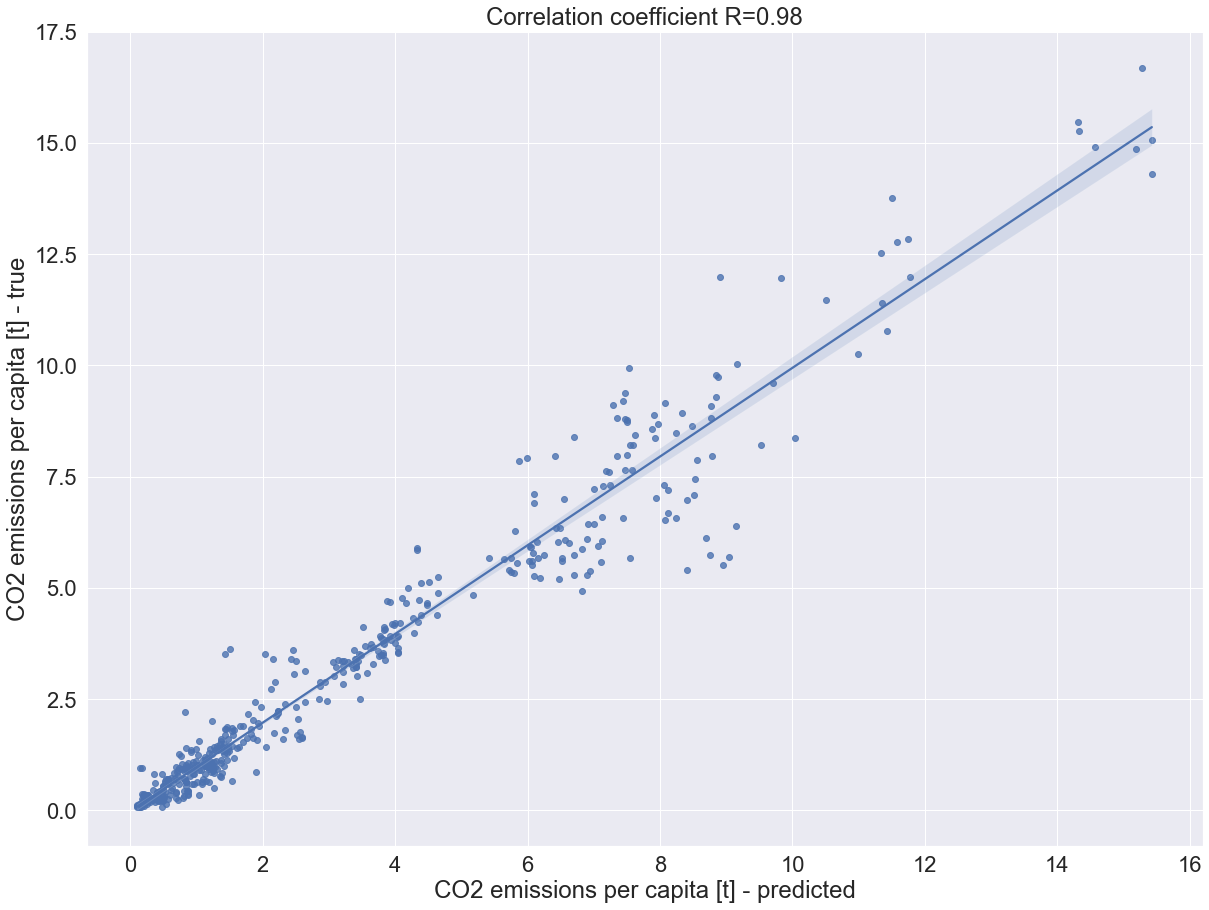

In [59]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()